# 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Flatten

2025-03-23 15:40:16.422554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-23 15:40:16.422717: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-23 15:40:16.601392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


MNIST dataset is a famous dataset and is even included in keras datasets library

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train[0].shape

(28, 28)

Images are of dimention 28 by 28 pixels 

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train.shape
#In total there are 60,000 images of 28 by 28 in x_train

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train
#First number is 5 , second is 2

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

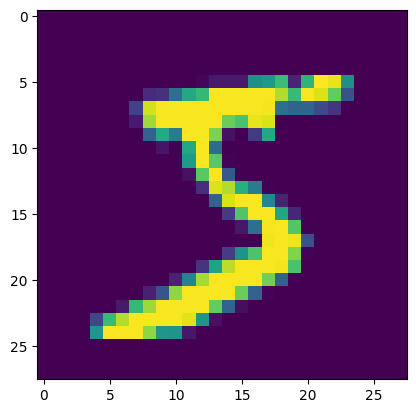

In [9]:
#Since these numbers represents an image we will now see the images
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

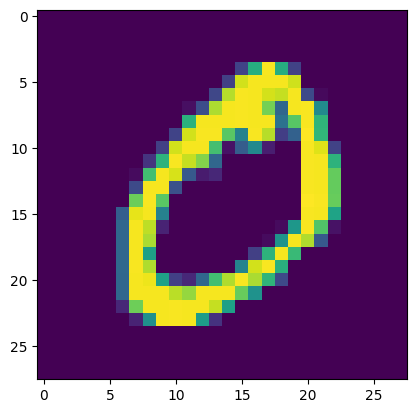

In [10]:
plt.imshow(x_train[1])

In [11]:
# The values are in range of 0 - 255  
# So we have to scale them to 0-1 for getting weights faster for our ANN
# 0/255 = 0 , 255/255 = 1 so all values will be in range 0-1
x_train = x_train/255
x_test = x_test/ 255

In [12]:
#Since most of the picture is black and only some places have colur to represent numbers we get  a lot of 0s
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
#We will build a neural network architecture 
model = Sequential()
#28*28 = 784
# The picture is represented in a 2D array of 28 by 28
# So we have to flatten it first
#28,28 -----> ,784
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation='softmax'))
#More then one nodes in output so used softmax

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "Adam")

In [16]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2868 - val_loss: 0.1544
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1297 - val_loss: 0.1239
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0894 - val_loss: 0.0986
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0665 - val_loss: 0.1077
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0512 - val_loss: 0.0876
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0397 - val_loss: 0.0929
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0311 - val_loss: 0.0846
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0241 - val_loss: 0.0851
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0206 - val_loss: 0.0920
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.015

In [17]:
history.history

{'loss': [0.2867642939090729,
  0.12974846363067627,
  0.08940906822681427,
  0.06650848686695099,
  0.0511760339140892,
  0.039728399366140366,
  0.031051060184836388,
  0.02410198375582695,
  0.020623357966542244,
  0.015806512907147408],
 'val_loss': [0.1543945074081421,
  0.12386436760425568,
  0.09864508360624313,
  0.10769063979387283,
  0.08758494257926941,
  0.09292642027139664,
  0.08464262634515762,
  0.08509010821580887,
  0.0919935405254364,
  0.09791411459445953]}

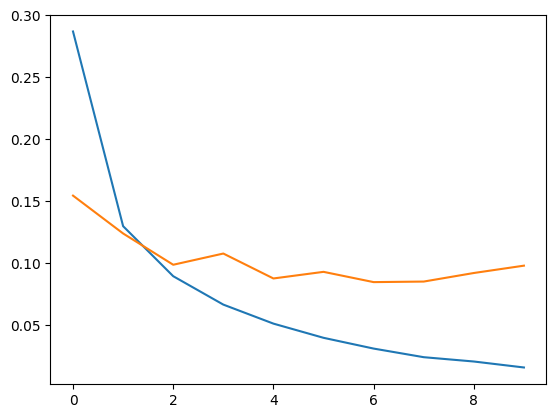

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [19]:
y_probability = model.predict(x_test)
#It will have for each image probability of it being a 0,probability of it being a 1 ---- to probability of the picture being a 9

313/313 [==============================] - 1s 1ms/step


In [20]:
y_probability

array([[1.5482142e-08, 1.8622789e-10, 1.2560265e-07, ..., 9.9997610e-01,
        2.0971770e-07, 6.3100510e-06],
       [9.4836240e-12, 3.6935011e-09, 9.9999982e-01, ..., 1.6851532e-18,
        1.3526336e-07, 5.2312907e-17],
       [1.1344733e-07, 9.9961954e-01, 4.6022218e-05, ..., 2.3211590e-04,
        8.5171487e-05, 1.3919995e-07],
       ...,
       [7.7614795e-18, 8.4697096e-16, 4.4078125e-15, ..., 5.8263043e-09,
        2.0612728e-10, 7.2184361e-07],
       [7.1005387e-15, 7.7555354e-18, 1.1696391e-17, ..., 7.2420282e-13,
        1.1181280e-08, 1.3108834e-17],
       [7.8969930e-12, 1.2967583e-17, 1.8012175e-11, ..., 3.0897206e-18,
        5.5260280e-14, 1.3135992e-13]], dtype=float32)

In [21]:
y_pred = y_probability.argmax(axis=1)
#It will give the number having the maximum probability ( A picture having max probability of 9 will be having 9 as prediction)

In [22]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9764